## 4.2 배치 정규화 수행

In [14]:
import torch
from torch import nn


x = torch.FloatTensor(
    [
        [-0.6577, -0.5797, 0.6360],
        [0.7392, 0.2145, 1.523],
        [0.2432, 0.5662, 0.322]
    ]
)

print(nn.BatchNorm1d(3)(x))

tensor([[-1.3246, -1.3492, -0.3756],
        [ 1.0912,  0.3077,  1.3685],
        [ 0.2334,  1.0415, -0.9930]], grad_fn=<NativeBatchNormBackward0>)


### 가중치 초기화(Weight Initialization)

In [15]:
from torch  import nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)
        self._init_weights()

    def _init_weights(self):
        nn.init.xavier_uniform_(self.layer[0].weight)
        self.layer[0].bias.data.fill_(0.01)

        nn.init.xavier_uniform_(self.fc.weight)
        self.fc.bias.data.fill_(0.01)

model = Net()

In [16]:
from torch  import nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)
        self.apply(self._init_weights)


    def _init_weights(self, module):
        if isinstance(self, nn.Linear):
            nn.init.xavier_uniform_(self.weight)
            nn.init.constant_(self.bias, 0.01)
        print(f"Apply : {module}")

model = Net()

Apply : Linear(in_features=1, out_features=2, bias=True)
Apply : Sigmoid()
Apply : Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
)
Apply : Linear(in_features=2, out_features=1, bias=True)
Apply : Net(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): Sigmoid()
  )
  (fc): Linear(in_features=2, out_features=1, bias=True)
)


### 정칙화

In [17]:
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)

    _lambda = 0.5
    l1_loss = sum(p.abs().sum() for p in model.parameters())

    loss = criterion(output, y) + _lambda * l1_loss

NameError: name 'train_dataloader' is not defined

for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)

    _lambda = 0.5
    l2_loss = sum(p.pow(2.0).sum() for p in model.parameters())

    loss = criterion(output, y) + _lambda * l2_loss

In [18]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

In [19]:
from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 10)
        self.dropout = nn.Dropout(p=0.5)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.dropout(x)
        x = self.layer2(x)
        return x

In [20]:
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)

    optimizer.step()

NameError: name 'train_dataloader' is not defined

### ContexualWordEmbsAug)

In [21]:
import nlpaug.augmenter.word as naw

texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.ContextualWordEmbsAug(model_path="bert-base-uncased", action="insert")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : for those who can imagine... anything, can sometimes create even the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : we can actually only see a fair short moving distance ahead, but surely we can see plenty there that still needs always to be be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : and if indeed a machine is expected to be infallible, as it cannot but also therefore be absolutely intelligent.
------------------


In [22]:
import nlpaug.augmenter.char as nac


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = nac.RandomCharAug(action="delete")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Tos who can magi anytg, can create the iossile.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can nl see a sot isanc aad, but we can see plenty the at needs to be de.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a mahn is xpetd to be nallile, it cnnt also be telgent.
------------------


In [23]:
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.RandomWordAug(action="swap")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Who those anything can imagine, can the create impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can only see a distance short but ahead, we can see there plenty needs that to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : A if is machine to expected be, infallible it also cannot be intelligent.
------------------


In [24]:
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.SynonymAug(aug_src='wordnet')
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chohi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng/[0m

  Searched in:
    - '/Users/chohi/nltk_data'
    - '/Users/chohi/project/ai/DeepLearningDeepen/DeepLearningAdv/.venv/nltk_data'
    - '/Users/chohi/project/ai/DeepLearningDeepen/DeepLearningAdv/.venv/share/nltk_data'
    - '/Users/chohi/project/ai/DeepLearningDeepen/DeepLearningAdv/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [25]:
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]
reserved_tokens = [
    ["can", "can't", "cannot", "could"],
]

reserved_aug = naw.ReservedAug(reserved_tokens=reserved_tokens)
augmented_texts = reserved_aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Those who could imagine anything, can't create the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We cannot only see a short distance ahead, but we cannot see plenty there that needs to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a machine is expected to be infallible, it could also be intelligent.
------------------


In [26]:
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

back_translation = naw.BackTranslationAug(
    from_model_name='facebook/wmt19-en-de',
    to_model_name='facebook/wmt19-de-en'
)
augmented_texts = back_translation.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-en-de and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-de-en and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggin

src : Those who can imagine anything, can create the impossible.
dst : "If you can imagine anything, you can do the impossible," he said.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can only take a brief look ahead, but we can see that there is still a lot to be done to be done to be done. We have to be done, and that is a lot of us, and that is a lot of us to be done, and that is a lot of us, and that is a lot of us, and that is to be done, and that is to be done, and that is to be done, and that is a lot of it is to be done, and that is to be done, and that is to be done, and that is to be done, and that is a lot of it, and that is to be done, and that is to be done, and that is to be done, is to be done, and that is to be done, is to be done, and that is to be done, is to be done, is to be done, is to be done, is to be done, is to be done, and that is to be done, and that is to be done, is to be done, i

### 이미지 데이터

In [33]:
from matplotlib import pyplot as plt

In [41]:
from PIL import Image
from torchvision import transforms

tranform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])

image = Image.open("../datasets/images/cat.jpg")
transformed_image = tranform(image)

print(transformed_image.shape)

torch.Size([3, 512, 512])


### 회전 및 대칭

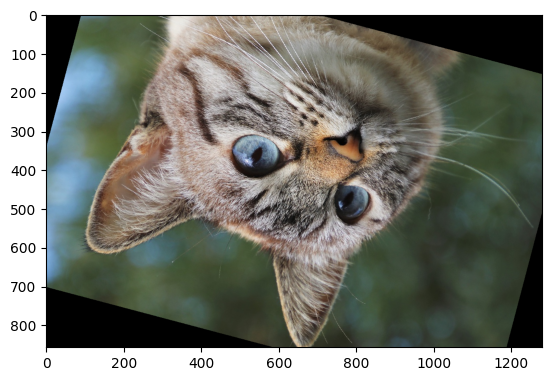

In [40]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.RandomRotation(degrees=30, expand=False, center=None),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5)
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

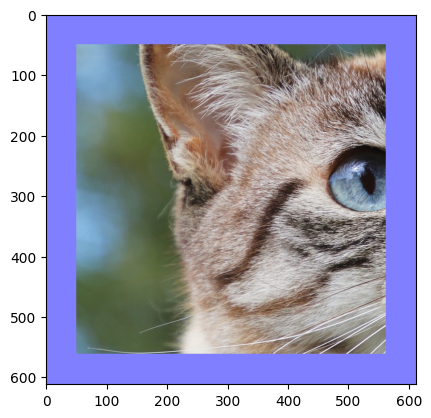

In [43]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.RandomCrop(size=(512,512)),
        transforms.Pad(padding=50, fill=(127,127,255), padding_mode="constant")
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

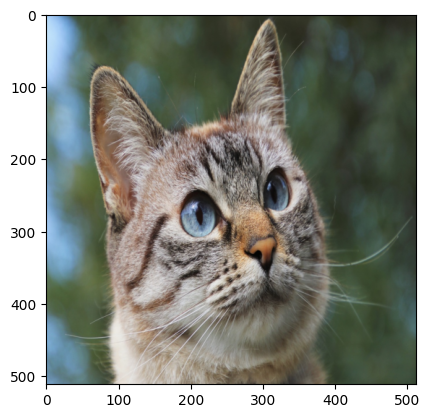

In [45]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.Resize(size=(512,512))
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

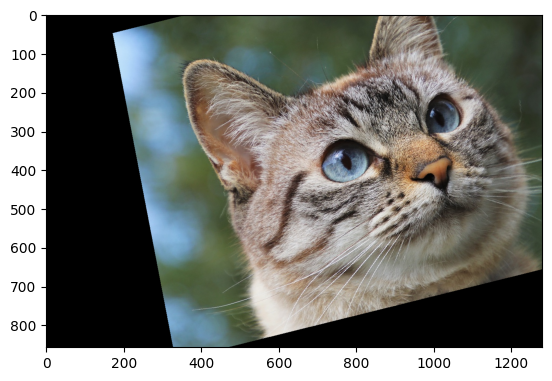

In [47]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.RandomAffine(
            degrees=14, translate=(0.2, 0.2),
            scale=(0.8, 1.2), shear=15
        )
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

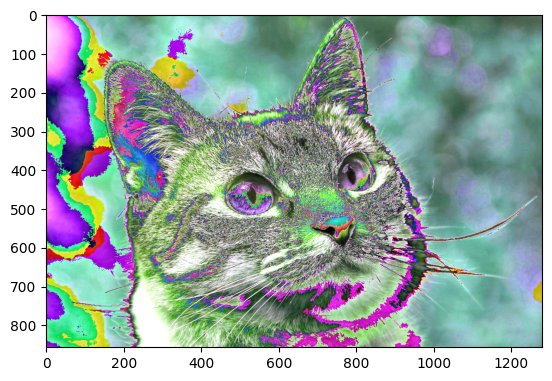

In [49]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
        transforms.ToPILImage()
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

### 노이즈 추가 예시

(857, 1280, 3) uint8


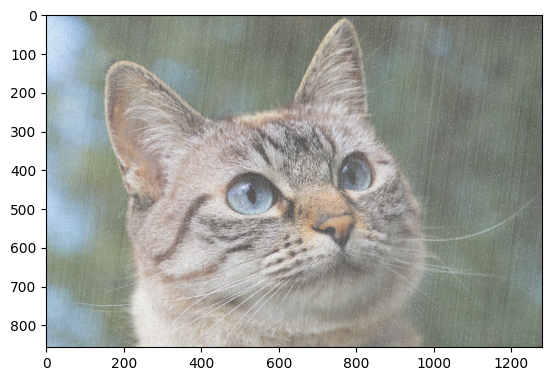

In [39]:
import numpy as np
np.bool = np.bool_ # Deprecated 오류 방지
from PIL import Image
from torchvision import transforms
from imgaug import augmenters as iaa

class IaaTransforms:
    def __init__(self):
        self.seq = iaa.Sequential([
            iaa.SaltAndPepper(p=(0.03, 0.07)),
            iaa.Rain(speed=(0.3, 0.7)),
        ])

    def __call__(self, images):
        images = np.array(images)
        print(images.shape, images.dtype)
        augmented = self.seq.augment_image(images)
        return Image.fromarray(augmented)

transform = transforms.Compose(
    [
        IaaTransforms()
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

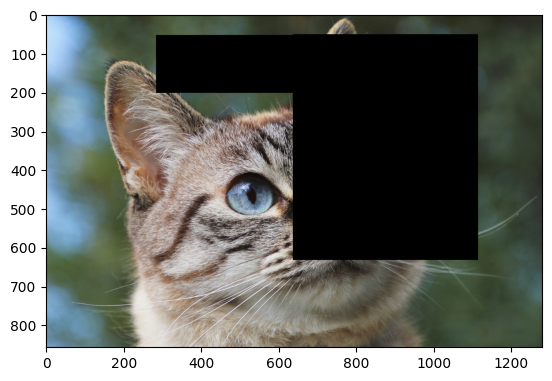

In [50]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.RandomErasing(p=1.0, value=0),
        transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False),
        transforms.ToPILImage()
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

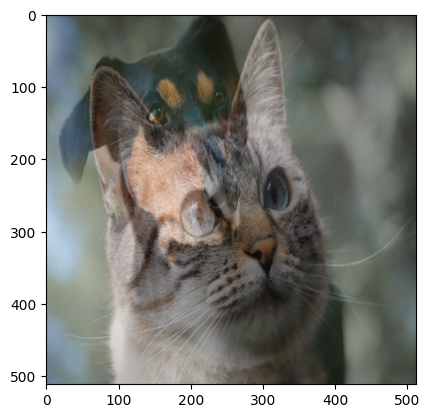

In [51]:
import numpy as np
from PIL import Image
from torchvision import transforms


class Mixup:
    def __init__(self, target, scale, alpha=0.5, beta=0.5):
        self.target = target
        self.scale = scale
        self.alpha = alpha
        self.beta = beta

    def __call__(self, image):
        image = np.array(image)
        target = self.target.resize(self.scale)
        target = np.array(target)
        mix_image = image * self.alpha + target * self.beta
        return Image.fromarray(mix_image.astype(np.uint8))


transform = transforms.Compose(
    [
        transforms.Resize((512, 512)),
        Mixup(
            target=Image.open("../datasets/images/dog.jpg"),
            scale=(512, 512),
            alpha=0.5,
            beta=0.5
        )
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)